# Unstructured Data Harvesting: EDGAR - Going to the Info Tables for each of the 13F HRs

#### So far, we have collected all the CIKs of Mutual Funds and the links to their individual 13F HR filings. In each of the 13F HR, there is an information table (Info Tables) with the list of all the companies and their shares that a mutual fund consists of. These information tables can either be in xml formats for the recent ones and for older filings are in the form text tables. The next step of the lesson will be to get the links of each of these information tables, and also to check whether these are text files or xml files

#### The individual 13F HR pages looks like this:

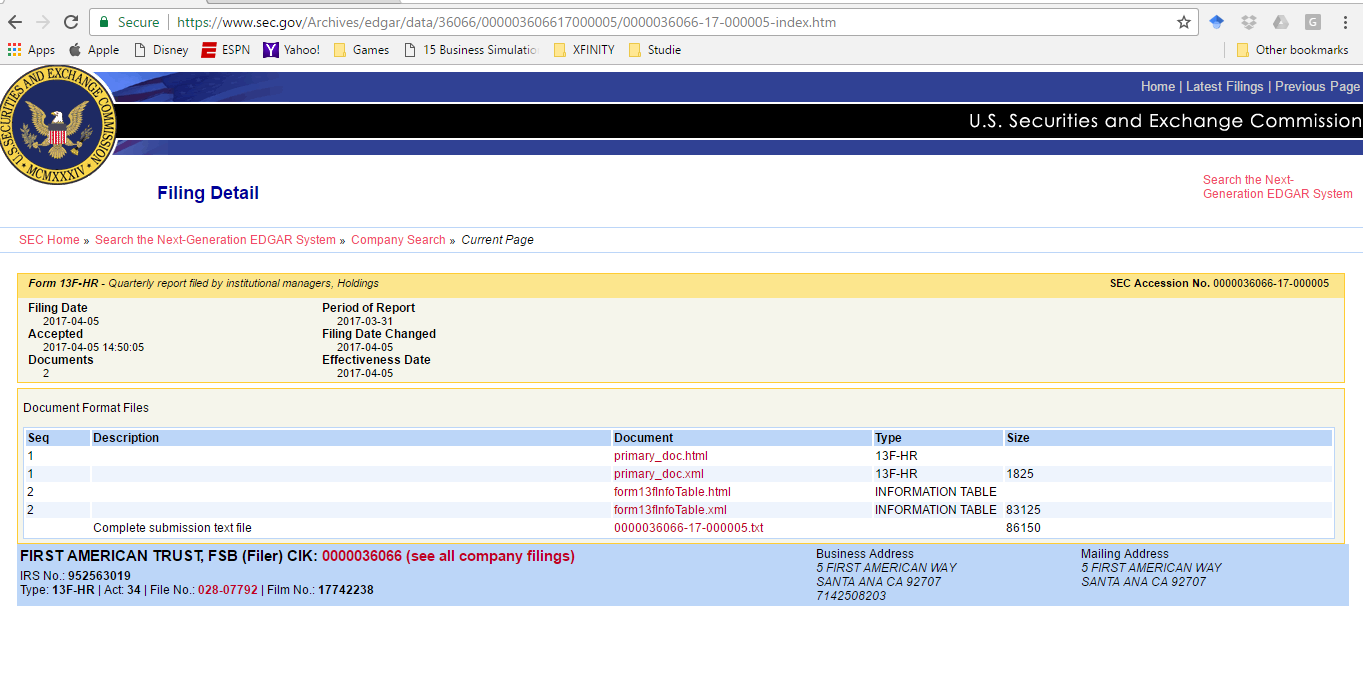

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


In [1]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_InfoTable_1.png',width=800,height=10)

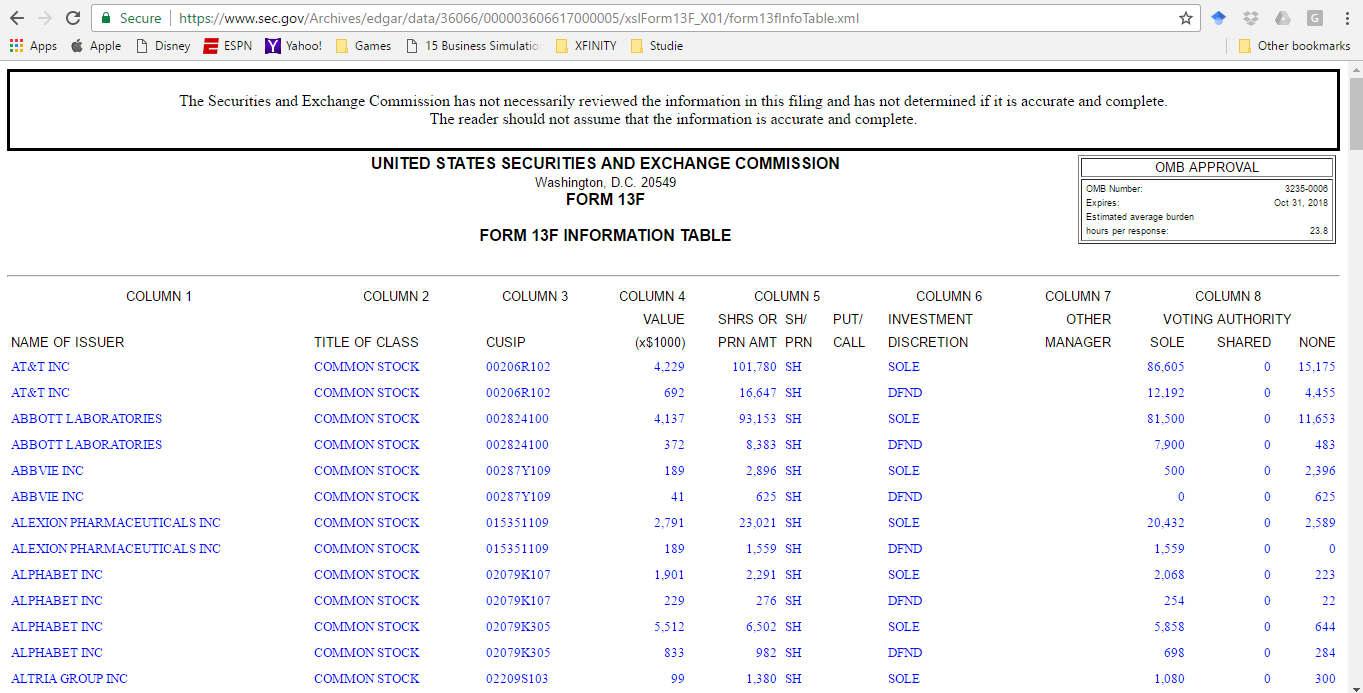

In [2]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_InfoTable_2.png',width=800,height=10)

#### The above two show screenshots for XML tables. The text format Info Table pages and the tables look like the following:

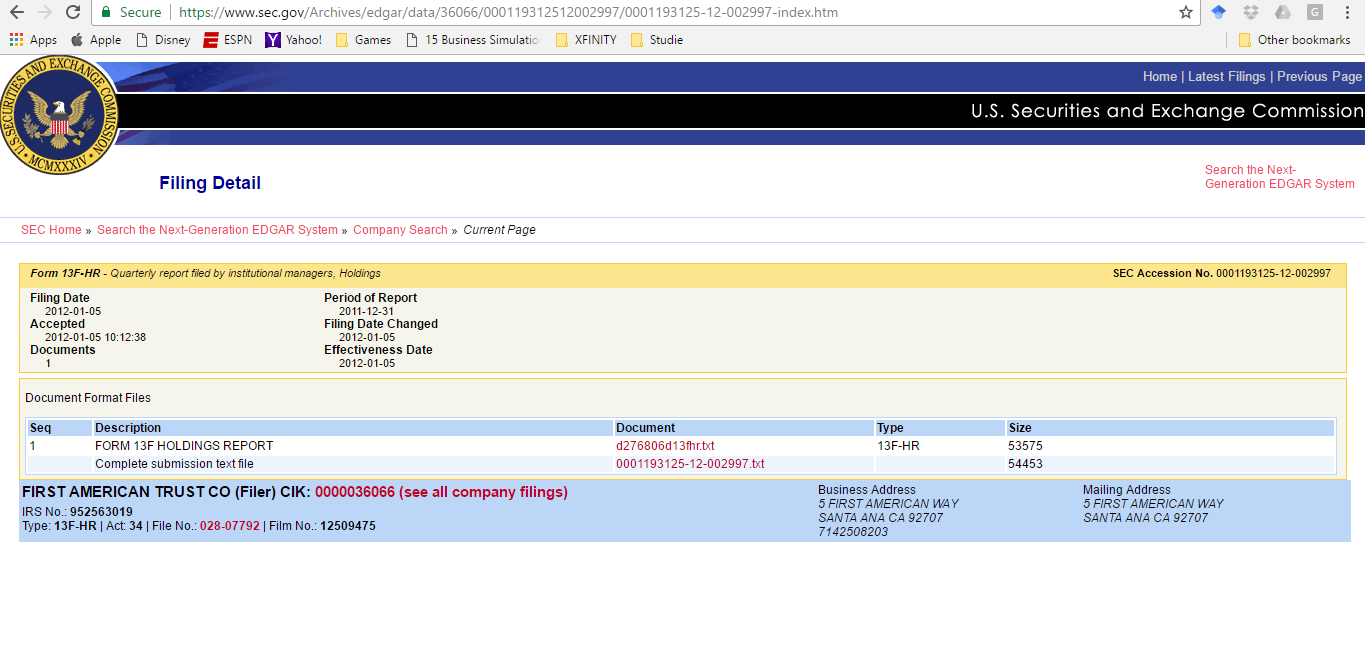

In [3]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_InfoTable_3.png',width=800,height=10)

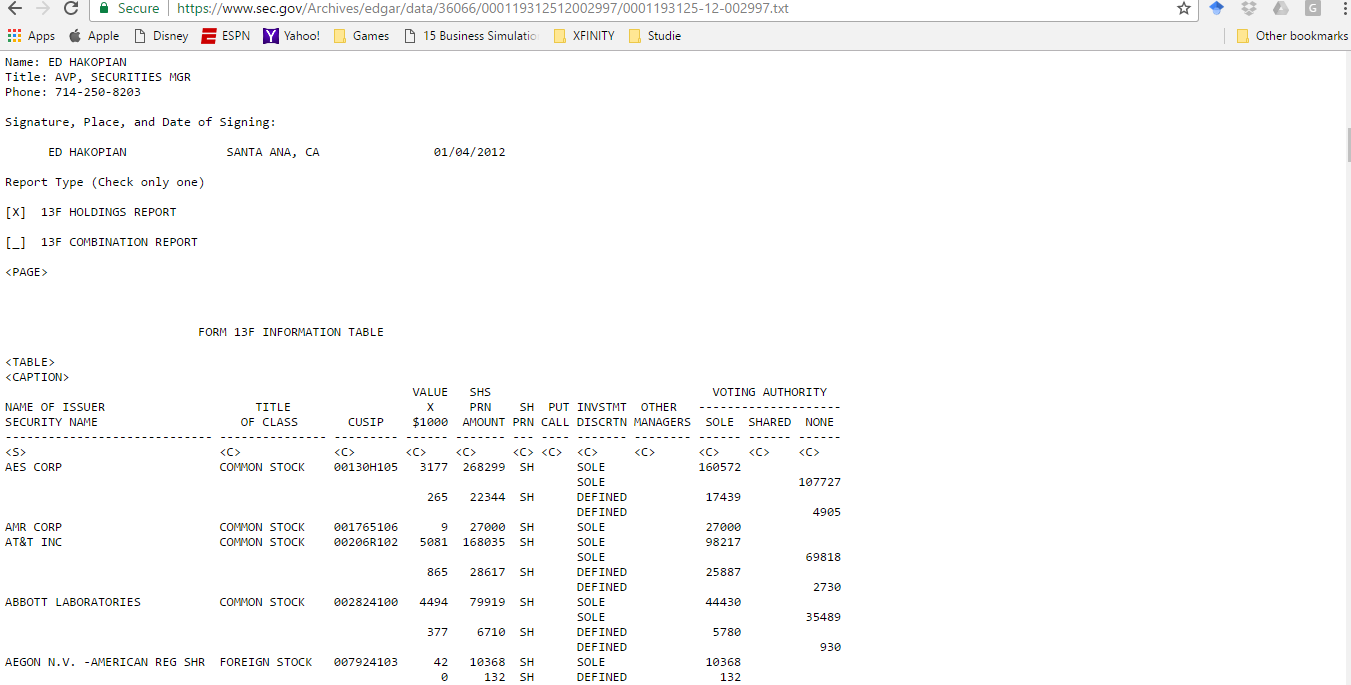

In [4]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_InfoTable_4.png',width=800,height=10)

#### The link for the info tables in xml format could be obtained by inspecting the individual 13F HR page. Note that xml submissions come at serial '2'

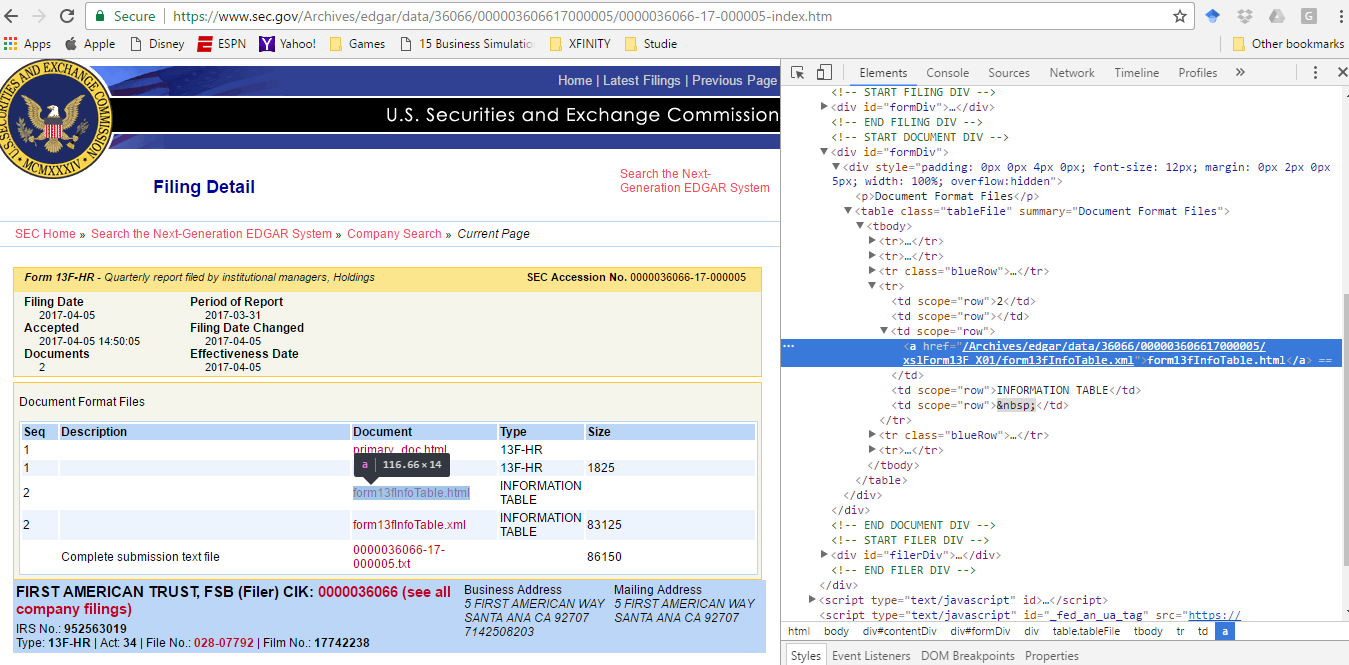

In [5]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_InfoTable_5.png',width=800,height=10)

#### For the text submission we can look at the following screenshot. Note that here the serial of info table submission is 1

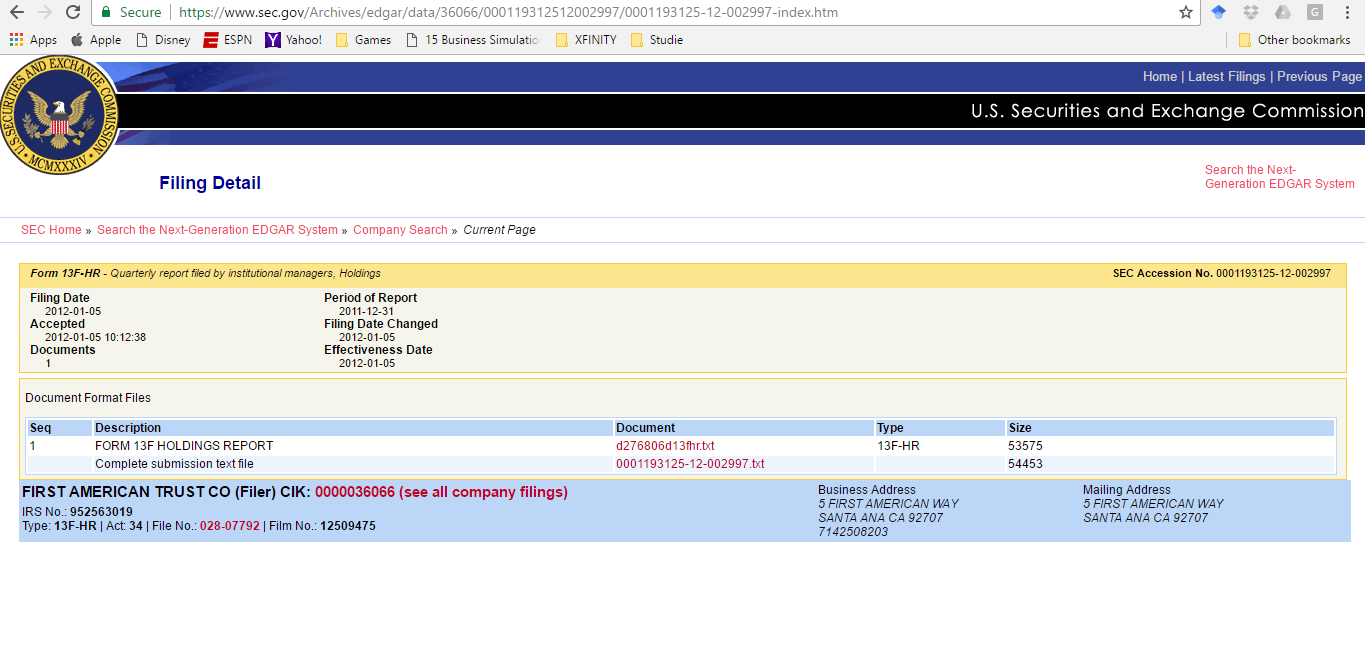

In [6]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_InfoTable_3.png',width=800,height=10)

#### To get this code, we will be using the same principles we have been using for this lecture session. We just have to remember one added thing - for xml submission we will require to look for a list no. 2 in our html document, and for text submission, we will need to look for list no. 1, so we need to use the IF - ELSE structure here:

In [7]:
import urllib.request, urllib.error, urllib.parse # Importing the library to load URLS

# Creating the required lists
CIK = []
Name = []
Link = []
Urls = []
date = []
info_table = []
info_type = []

In [8]:
#Reading the links of indivudual 13F HR tables from the previous life
input_file = open('Files_Directory/Edgar/Mutual_Fund_13F_links.txt', 'r')

rows = input_file.readlines()
input_file.close()

In [9]:
rows[0:10]

['CIK\tCompany\tLinks\n',
 '0001311981\tAdirondack_Funds\t/Archives/edgar/data/1574010/000157401018000003/0001574010-18-000003-index.htm\t\n',
 '0001311981\tAdirondack_Funds\t/Archives/edgar/data/1574010/000157401018000002/0001574010-18-000002-index.htm\t\n',
 '0000813470\tADVANCE_CAPITAL_I_INC\t/Archives/edgar/data/1311981/000116204415001166/0001162044-15-001166-index.htm\t\n',
 '0000813470\tADVANCE_CAPITAL_I_INC\t/Archives/edgar/data/1311981/000116204413000513/0001162044-13-000513-index.htm\t\n',
 '0000813470\tADVANCE_CAPITAL_I_INC\t/Archives/edgar/data/813470/000151597116000610/0001515971-16-000610-index.htm\t\n',
 '0000813470\tADVANCE_CAPITAL_I_INC\t/Archives/edgar/data/813470/000151597116000570/0001515971-16-000570-index.htm\t\n',
 '0000813470\tADVANCE_CAPITAL_I_INC\t/Archives/edgar/data/813470/000151597116000494/0001515971-16-000494-index.htm\t\n',
 '0000813470\tADVANCE_CAPITAL_I_INC\t/Archives/edgar/data/813470/000151597116000435/0001515971-16-000435-index.htm\t\n',
 '0000813470

In [10]:
for i in range(1, len(rows)):
    columns = rows[i].split('\t')
    CIK.append(columns[0])
    Name.append(columns[1])
    Link.append(columns[2])
CIK[0:10]

['0001311981',
 '0001311981',
 '0000813470',
 '0000813470',
 '0000813470',
 '0000813470',
 '0000813470',
 '0000813470',
 '0000813470',
 '0000813470']

In [11]:
for item in Link:
    temp_url = "https://www.sec.gov" + item
    Urls.append(temp_url)
Urls[0:10]

['https://www.sec.gov/Archives/edgar/data/1574010/000157401018000003/0001574010-18-000003-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1574010/000157401018000002/0001574010-18-000002-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1311981/000116204415001166/0001162044-15-001166-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1311981/000116204413000513/0001162044-13-000513-index.htm',
 'https://www.sec.gov/Archives/edgar/data/813470/000151597116000610/0001515971-16-000610-index.htm',
 'https://www.sec.gov/Archives/edgar/data/813470/000151597116000570/0001515971-16-000570-index.htm',
 'https://www.sec.gov/Archives/edgar/data/813470/000151597116000494/0001515971-16-000494-index.htm',
 'https://www.sec.gov/Archives/edgar/data/813470/000151597116000435/0001515971-16-000435-index.htm',
 'https://www.sec.gov/Archives/edgar/data/813470/000151597115000375/0001515971-15-000375-index.htm',
 'https://www.sec.gov/Archives/edgar/data/813470/000151597115000255/0001515971-15-00025

In [12]:
for page in Urls[0:10]:
    html = urllib.request.urlopen(page).read().decode('utf-8')
    
    date_index = html.find('div class=\"infoHead\">Filing Date<')
    date_html = html[date_index:]
    date_index2 = date_html.find('class=\"info\">')
    date_html = date_html[date_index2:]
    start = date_html.find(">")
    end = date_html.find("<")
    date.append(date_html[start+1:end])  # This gets us the date
    
    if html.find('td scope=\"row\">2<') != -1: # By this condition we check whether there is a xml version. For an xml version there are two items present in each table in the page
        
        index = html.find('td scope=\"row\">2<')
        html2 = html[index:]
    
        start = html2.find('a href=\"/Archives/edgar/data/')
        remaining = html2[start:]
        end = remaining.find('>')
    
        info_table.append(remaining[8:end-1]) # we collect the link
    
        info_type.append('xml') # we mention that this is an xml link
            
    else: # Or else, we get the idea that the info table is in text format
        
        index = html.find('td scope=\"row\">Complete submission text file')
        html2 = html[index:]
        
        start = html2.find('a href=\"/Archives/edgar/data/')
        remaining = html2[start:]
        end = remaining.find('>')
    
        info_table.append(remaining[8:end-1]) 

        info_type.append('text') # we mention that this is a text link

In [13]:
info_type

['xml', 'xml', 'xml', 'text', 'xml', 'xml', 'xml', 'xml', 'xml', 'xml']

In [14]:
info_table

['/Archives/edgar/data/1574010/000157401018000003/xslForm13F_X01/lowe2q18.xml',
 '/Archives/edgar/data/1574010/000157401018000002/xslForm13F_X01/lowe1q18.xml',
 '/Archives/edgar/data/1311981/000116204415001166/xslForm13F_X01/infotable.xml',
 '/Archives/edgar/data/1311981/000116204413000513/0001162044-13-000513.txt',
 '/Archives/edgar/data/813470/000151597116000610/xslForm13F_X01/infotable.xml',
 '/Archives/edgar/data/813470/000151597116000570/xslForm13F_X01/infotable.xml',
 '/Archives/edgar/data/813470/000151597116000494/xslForm13F_X01/infotable.xml',
 '/Archives/edgar/data/813470/000151597116000435/xslForm13F_X01/infotable.xml',
 '/Archives/edgar/data/813470/000151597115000375/xslForm13F_X01/infotable.xml',
 '/Archives/edgar/data/813470/000151597115000255/xslForm13F_X01/infotable.xml']

In [15]:
# Next we write the all these info table links down to a CSV file:

Output_File = open("Files_Directory/Edgar/Mutual_Fund_Info_Table_Link.txt", 'w')

Output_File.write("CIK, Name, Date, Information Table Links, File Type, \n")

for x in range(0, len(info_table)):
    Output_File.write(CIK[x] + '\t' + Name[x] + '\t' + date[x] + '\t' + info_table[x] + '\t' + info_type[x] + '\n')

Output_File.close()